# Glasgow Coma Score (GCS)

*GCSEye* is None (1), Pain (2), Verbal (3), Spontaneous (4)

*GCSVerbal* is None (1), Incomprehensible sounds (moans) (2), Innappropriate words (cries to pain) (3), Confused (irritable/cries) (4), Oriented (coos/bables) (5)

*GCSMotor* is None (1), Abnormal etension posturing (2), Abnormal flexure posturing (3), Withdraws to pain (4), Localizes pain (withdraws to touch) (5), Follow commands (spontaneous movement) (6)

*GCSTotal* is the sum of the three preceeding GCS categories

*GCSGroup* is a grouping of GCS 3-13 and GCS 14-15


In [47]:
# call the 02-data-cleaning.ipynb notebook to bring the pecarn_tbi dataframe and the cleaned dataframe into the environment
%cd -q ../notebooks
%run ./02-data-cleaning.ipynb
%cd -q -

START: 00-load-raw-data.ipynb
  PECARN TBI data read from c:\Jan\Capstone\notebooks/TBI PUD 10-08-2013.csv into "pecarn_tbi" dataframe
START: 01-data-labelling.ipynb
START: 02-data-cleaning.ipynb
  PosIntFinal - Dropping 20 rows where PosIntFinal is NaN
  Dropping 3 rows where Gender is NaN
  Setting 15954 rows where Ethnicity is NaN to Non-Hispanic
  Setting 2028 rows where Race is NaN and Ethnicity is Hispanic to White
  Dropping records where GCS < 14
  Dropping GCSGroup as it is now redundant
  Filling missing GCSEye, GCSVerbal, GCSMotor when GCSTotal is 15
  Dropping AgeInMonth
  Renaming AgeinYears to Age
  Dropping EmplType
  Dropping Certification
  Dropping High_impact_InjSev
  Renaming InjuryMech to Injury_Mechanism
  Renaming ActNorm to Acting_Normal
  Setting Acting_Normal missing data to 1 (Yes)
  Dizzy - Dropping column with 36.8% NaNs
  Dropping Ind## columns
  Dropping Findings## columns
  Dropping CT columns
  Dropping EDCT column
  Dropping PosCT column
  Dropping EDD

# GCS Group

In the PECARN study, they excluded 969 patients with a GCS score of < 14.

They excluded these patients on the basis that the risk of TBI on a CT scan is > 20% and this risk outweighs the radiation risk from CT, and therefore radiation risk from CT is not controversial.

In [48]:
pecarn_tbi.groupby('GCSGroup').count()

,AMS,AMSAgitated,AMSOth,AMSRepeat,AMSSleep,AMSSlow,ActNorm,AgeInMonth,AgeTwoPlus,AgeinYears,Amnesia_verb,CTDone,CTForm1,CTSed,CTSedAge,CTSedAgitate,CTSedOth,CTSedRqst,Certification,Clav,ClavFace,ClavFro,ClavNeck,ClavOcc,ClavPar,ClavTem,DeathTBI,Dizzy,Drugs,EDCT,EDDisposition,EmplType,Ethnicity,Finding1,Finding10,Finding11,Finding12,Finding13,Finding14,Finding2,Finding20,Finding21,Finding22,Finding23,Finding3,Finding4,Finding5,Finding6,Finding7,Finding8,Finding9,FontBulg,GCSEye,GCSMotor,GCSTotal,GCSVerbal,Gender,HASeverity,HAStart,HA_verb,Hema,HemaLoc,HemaSize,High_impact_InjSev,HospHead,HospHeadPosCT,IndAMS,IndAge,IndAmnesia,IndClinSFx,IndHA,IndHema,IndLOC,IndMech,IndNeuroD,IndOth,IndRqstMD,IndRqstParent,IndRqstTrauma,IndSeiz,IndVomit,IndXraySFx,InjuryMech,Intub24Head,Intubated,LOCSeparate,LocLen,NeuroD,NeuroDCranial,NeuroDMotor,NeuroDOth,NeuroDReflex,NeuroDSensory,Neurosurgery,OSI,OSIAbdomen,OSICspine,OSICut,OSIExtremity,OSIFlank,OSIOth,OSIPelvis,Observed,Paralyzed,PosCT,PosIntFinal,Race,SFxBas,SFxBasHem,SFxBasOto,SFxBasPer,SFxBasRet,SFxBasRhi,SFxPalp,SFxPalpDepress,Sedated,Seiz,SeizLen,SeizOccur,Vomit,VomitLast,VomitNbr,VomitStart
GCSGroup,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,969,969,969,969,969,969,644,969,969,969,745,969,969,944,969,969,969,969,969,961,969,969,969,969,969,969,967,121,928,969,964,969,546,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,961,938,926,969,929,969,935,950,763,956,959,936,948,968,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,969,951,968,954,796,698,669,969,969,969,969,969,968,956,969,969,969,969,969,969,969,892,953,969,967,849,945,969,969,969,969,969,966,945,951,777,927,948,827,887,925,926
2,42114,42430,42430,42430,42430,42430,39420,42430,42430,42430,40358,42430,42402,41541,42430,42430,42430,42430,42430,42301,42430,42430,42430,42430,42430,42430,42424,27306,40653,42430,42410,42412,26887,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42271,41173,41163,42430,41172,42427,41420,41117,41984,42138,42229,41721,42117,42428,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42430,42147,42427,42120,40711,40145,42070,42430,42430,42430,42430,42430,42430,42248,42430,42430,42430,42430,42430,42430,42430,40131,42110,42430,42412,39342,42009,42430,42430,42430,42430,42430,42329,42399,42109,41710,42355,42380,42129,41520,42177,42060


In [49]:
pecarn_tbi.loc[pecarn_tbi['PosIntFinal'].eq('Yes'), ['GCSGroup', 'PosIntFinal']].groupby('GCSGroup').count()

,PosIntFinal
GCSGroup,
1,387
2,376


# Missing Values

In [50]:
pecarn_tbi[['GCSEye', 'GCSVerbal', 'GCSMotor', 'GCSTotal', 'GCSGroup']].isna().sum()

GCSEye       1288
GCSVerbal    1298
GCSMotor     1310
GCSTotal        0
GCSGroup        0
dtype: int64

In [51]:
data[['GCSEye', 'GCSVerbal', 'GCSMotor', 'GCSTotal']].isna().sum()

GCSEye       20
GCSVerbal    20
GCSMotor     22
GCSTotal      0
dtype: int64

There are a lot of records where a GCSTotal is given, but there are NaNs in *GGSEye*, *GCSVerbal*, *GCSMotor*.

In these cases we can set the values of *GCSEye*, *GCSVerbal*, and *GCSMotor*, as they must all be the highest value.

In [52]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data[data['GCSEye'].isna()].head(5)

,AMS,AMSAgitated,AMSOth,AMSRepeat,AMSSleep,AMSSlow,Acting_Normal,Age,AgeTwoPlus,Amnesia_verb,Clav,ClavFace,ClavFro,ClavNeck,ClavOcc,ClavPar,ClavTem,Drugs,Ethnicity,FontBulg,GCSEye,GCSMotor,GCSTotal,GCSVerbal,Gender,HASeverity,HAStart,HA_verb,Hema,HemaLoc,HemaSize,Injury_Mechanism,Intubated,LOCSeparate,LocLen,NeuroD,NeuroDCranial,NeuroDMotor,NeuroDOth,NeuroDReflex,NeuroDSensory,OSI,OSIAbdomen,OSICspine,OSICut,OSIExtremity,OSIFlank,OSIOth,OSIPelvis,Paralyzed,PosIntFinal,Race,SFxBas,SFxBasHem,SFxBasOto,SFxBasPer,SFxBasRet,SFxBasRhi,SFxPalp,SFxPalpDepress,Sedated,Seiz,SeizLen,SeizOccur,Vomit,VomitLast,VomitNbr,VomitStart
PatNum,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
838,Yes,Yes,No,No,No,Yes,Yes,1,1,NaN,Yes,Yes,No,No,No,No,No,No,Non-Hispanic,No,NaN,NaN,14,NaN,Male,NA,NA,Pre/Non Verbal,No,NA,NA,Assault,No,Yes,NaN,No,NA,NA,NA,NA,NA,Yes,No,Yes,No,No,No,No,No,No,No,NaN,No,NA,NA,NA,NA,NA,No,NA,No,NaN,NA,NA,NaN,NA,NA,NA
1390,Yes,Yes,No,No,No,No,No,3,2,Pre/Non Verbal,No,NA,NA,NA,NA,NA,NA,No,Non-Hispanic,No,NaN,NaN,14,NaN,Female,NA,NA,Pre/Non Verbal,No,NA,NA,Fall Stairs,No,No,NA,No,NA,NA,NA,NA,NA,No,NA,NA,NA,NA,NA,NA,NA,No,No,White,No,NA,NA,NA,NA,NA,No,NA,No,No,NA,NA,No,NA,NA,NA
2282,Yes,Yes,No,Yes,No,No,Yes,15,2,No,Yes,Yes,No,No,No,Yes,No,Yes,Non-Hispanic,No,NaN,NaN,14,NaN,Female,NA,NA,No,Yes,Parietal/Temporal,NaN,Occupant Vehicle,No,Suspected,NaN,No,NA,NA,NA,NA,NA,No,NA,NA,NA,NA,NA,NA,NA,No,Yes,White,Yes,Yes,No,No,No,No,No,NA,No,No,NA,NA,No,NA,NA,NA
3510,Yes,No,No,No,Yes,Yes,No,10,2,Yes,No,NA,NA,NA,NA,NA,NA,No,Non-Hispanic,No,NaN,NaN,14,NaN,Male,NA,NA,No,No,NA,NA,Fall Elevation,No,Yes,1-5min,No,NA,NA,NA,NA,NA,No,NA,NA,NA,NA,NA,NA,NA,No,Yes,Black,No,NA,NA,NA,NA,NA,No,NA,No,No,NA,NA,No,NA,NA,NA
3578,Yes,No,No,No,Yes,Yes,Yes,11,2,NaN,No,NA,NA,NA,NA,NA,NA,No,Non-Hispanic,No,NaN,NaN,14,NaN,Female,Moderate,Within 1hr,Yes,Yes,Frontal,Medium,Occupant Vehicle,No,NaN,NA,No,NA,NA,NA,NA,NA,No,NA,NA,NA,NA,NA,NA,NA,No,No,Asian,NaN,NA,NA,NA,NA,NA,No,NA,No,No,NA,NA,No,NA,NA,NA


In [53]:
# check all GCSTotal == 15 records have been set
(data[data['GCSTotal'] == 15 & (data['GCSEye'].isna() | data['GCSVerbal'].isna() | data['GCSMotor'].isna())]).count().max()

0

There are two records where there is just a missing *GCSMotor*, so these can be calculated


# Correlation of GCS to *PosIntFinal*

In [54]:
gcs = pecarn_tbi[(~pecarn_tbi['GCSEye'].isna() & ~pecarn_tbi['GCSVerbal'].isna() & ~pecarn_tbi['GCSMotor'].isna())]
gcs = gcs[['GCSEye', 'GCSVerbal', 'GCSMotor', 'GCSTotal', 'PosIntFinal']]
gcs.head(3)

,GCSEye,GCSVerbal,GCSMotor,GCSTotal,PosIntFinal
PatNum,,,,,
1,4,5,6,15,No
2,4,5,6,15,No
3,1,1,1,3,No


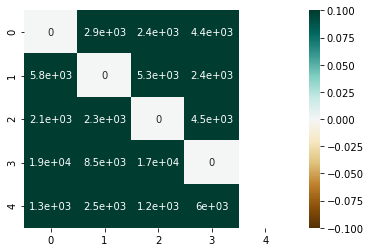

In [55]:
# see https://stackoverflow.com/a/48035423/1072989 - TBD
from scipy.stats import chisquare
import seaborn as sns

gcs_factored = gcs.apply(lambda x: pd.factorize(x)[0])+1

c = pd.DataFrame([chisquare(gcs_factored[x].values, f_exp=gcs_factored.values.T, axis=1)[0] for x in gcs_factored])
sns.heatmap(c, cmap="BrBG", annot=True)

In [56]:
gcs_data = data[['GCSEye', 'GCSVerbal', 'GCSMotor', 'PosIntFinal']]
gcs_data.head(3)

,GCSEye,GCSVerbal,GCSMotor,PosIntFinal
PatNum,,,,
1,4,5,6,No
2,4,5,6,No
4,4,5,6,No


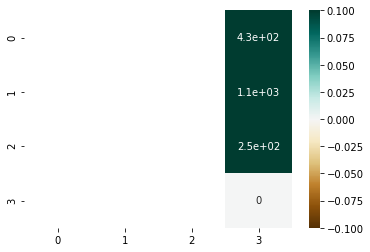

In [57]:
gcs_data_factored = gcs_data.apply(lambda x: pd.factorize(x)[0])+1

c2 = pd.DataFrame([chisquare(gcs_data_factored[x].values, f_exp=gcs_data_factored.values.T, axis=1)[0] for x in gcs_data_factored])
sns.heatmap(c2, cmap="BrBG", annot=True)